In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.models import Model

# # Define constants
# IMAGE_SIZE = (224, 224)
# BATCH_SIZE = 32
# NUM_EPOCHS = 10

# # Data augmentation and preprocessing
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# train_generator = train_datagen.flow_from_directory(
#     "/content/drive/MyDrive/Major_Project/Dataset",
#     target_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE,
#     class_mode='binary'
# )

# # Load pre-trained EfficientNet model
# base_model = EfficientNetB0(weights='imagenet', include_top=False)

# # Modify the model for binary classification
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(256, activation='relu')(x)
# output = Dense(1, activation='sigmoid')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(train_generator, epochs=20,shuffle=True)



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
images="/content/drive/MyDrive/random_20_processing"

In [ ]:
folders=os.listdir(images)
print(folders)

['positive', 'negative']


In [ ]:
import cv2

image_data=[]
labels=[]

In [ ]:
label_dict={
    'negative':0,
    'positive':1
}

In [ ]:
from keras.preprocessing import image
count=0
try:

    for file in folders:
        try:

            path=os.path.join(images,file)
            print(path)
            for im in os.listdir(path):
                try:

                    img=image.load_img(os.path.join(path,im),target_size=((64,64)))
                    img_array=image.img_to_array(img)
                    image_data.append(img_array)
                    labels.append(label_dict[file])
                except:
                    print("Error for processing one image")
                count=count+1
            print(count)
        except:
            print("Error in folder")
except:
    print("Done processing")



/content/drive/MyDrive/random_20_processing/positive
2940
/content/drive/MyDrive/random_20_processing/negative
5112


In [ ]:
print(len(image_data),len(labels))

5112 5112


In [ ]:
combined = list(zip(image_data,labels))
image_data[:],labels[:]=zip(*combined)

In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
x_train=np.array(image_data)
y_train=np.array(labels)

print(x_train.shape,y_train.shape)

(5112, 64, 64, 3) (5112,)


In [ ]:
from tensorflow.python.keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(5112, 64, 64, 3) (5112, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
augment = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.01,
    height_shift_range=0.01,
    horizontal_flip=False,
    vertical_flip=False,
)
augment.fit(x_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input


In [ ]:
model = EfficientNetB0(weights='imagenet', include_top=False)

In [ ]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, None, None, 3)        0         ['normalization_1

In [ ]:
for num in range(len(model.layers)):
    print(num,model.layers[num])

0 <keras.src.engine.input_layer.InputLayer object at 0x7cad25663820>
1 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7cad25662980>
2 <keras.src.layers.preprocessing.normalization.Normalization object at 0x7cad2f00f010>
3 <keras.src.layers.preprocessing.image_preprocessing.Rescaling object at 0x7cad4a0f8c40>
4 <keras.src.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7cad256939d0>
5 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7cad25692e00>
6 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7cad256915d0>
7 <keras.src.layers.core.activation.Activation object at 0x7cad25693ca0>
8 <keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7cad256a55d0>
9 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7cad256a6ec0>
10 <keras.src.layers.core.activation.Activation object at 0x7cad256a7df0>
11 <keras.src.layers.pooling.global_average_pooling2d.GlobalAverag

In [ ]:
for layer in model.layers[:233]:
  layer.trainable=False
for i,layer in enumerate(model.layers):
  print(i,layer.name,layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
x = GlobalAveragePooling2D()(model.output)

# Create the custom layers
fc1 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(d1)
d2 = Dropout(0.5)(fc2)
output_layer = Dense(2, activation='sigmoid')(d2)


model_E=Model(model.input,output_layer)
model_E.summary()
# predictions = Dense(2, activation='softmax')(x)



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, None, None, 3)        7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, None, None, 3)        0         ['normalization_1[0][0]'

In [ ]:


# Compile the model
model_E.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model_E.fit(x_train, y_train,
                          shuffle=True,
                          batch_size=32,
                          epochs=20,
                          validation_split=0.20)

Epoch 1/20
128/128 [==============================] - 52s 289ms/step - loss: 4.6841 - accuracy: 0.6659 - val_loss: 3.8101 - val_accuracy: 0.0088
Epoch 2/20
128/128 [==============================] - 34s 268ms/step - loss: 2.1313 - accuracy: 0.7185 - val_loss: 2.6358 - val_accuracy: 0.0068
Epoch 3/20
128/128 [==============================] - 33s 259ms/step - loss: 1.1643 - accuracy: 0.7227 - val_loss: 2.1083 - val_accuracy: 0.0831
Epoch 4/20
128/128 [==============================] - 33s 257ms/step - loss: 0.8177 - accuracy: 0.7442 - val_loss: 1.8473 - val_accuracy: 0.1584
Epoch 5/20
128/128 [==============================] - 38s 296ms/step - loss: 0.6713 - accuracy: 0.7586 - val_loss: 1.7325 - val_accuracy: 0.2385
Epoch 6/20
128/128 [==============================] - 33s 258ms/step - loss: 0.5936 - accuracy: 0.7821 - val_loss: 1.3565 - val_accuracy: 0.4037
Epoch 7/20
128/128 [==============================] - 38s 296ms/step - loss: 0.5500 - accuracy: 0.8048 - val_loss: 3.6862 - val_ac

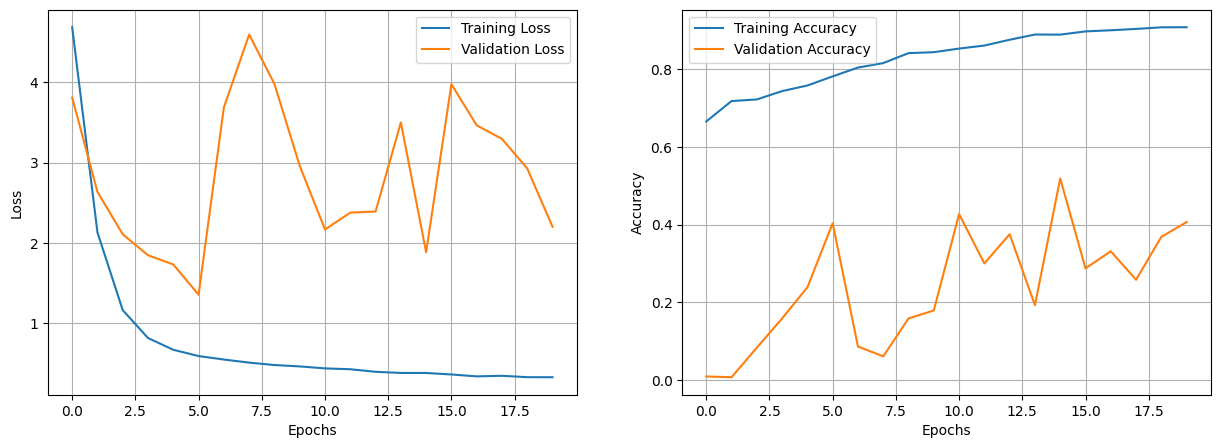

In [ ]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.grid(True)
plt.legend()

In [ ]:
# model.trainable=True

# new_learning_rate = 1e-5  # Example: You can set your desired learning rate here

# # Create a new Adam optimizer with the modified learning rate
# modified_optimizer = Adam(learning_rate=new_learning_rate)

# # Compile the model with the modified optimizer
# model_E.compile(optimizer=modified_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# # model_E.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# hist = model_E.fit(x_train, y_train,
#                           shuffle=True,
#                           batch_size=32,
#                           epochs=20,
#                           validation_split=0.20)

In [ ]:
model_E.save('Parkinson_Detection_Effecientnet.keras')



# test_steps = test_generator.samples // BATCH_SIZE
# loss, accuracy = model.evaluate(test_generator, steps=test_steps)
# print(f'Test Loss: {loss:.4f}')
# print(f'Test Accuracy: {accuracy:.4f}')

In [ ]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('Parkinson_Detection_Effecientnet.keras')

In [ ]:
test_images=r'/content/drive/MyDrive/Validation_Dataset'

test_image_data=[]
test_labels=[]

test_folders=os.listdir(test_images)
print(test_folders)

label_dict={
    'positive':1,
    'negative':0
}
count=0
from keras.preprocessing import image

for file in test_folders:
  path=os.path.join(test_images,file)
  for file1 in os.listdir(path):
    img=image.load_img(os.path.join(path,file1),target_size=((64,64)))
    img_array=image.img_to_array(img)
    test_image_data.append(img_array)
    test_labels.append(label_dict[file])
    count=count+1
  print(count)

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:]=zip(*combined)


print(test_labels)
x_test=np.array(test_image_data)
y_test=np.array(test_labels)




# hist=model.fit(x_train,y_train,
#                         shuffle=True,
#                         batch_size=32,
#                         epochs=1,
#                         validation_split=0.10)

['positive', 'negative']
715
1655
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
predictions = model.predict(x_test,batch_size=32)
predicted_labels = np.argmax(predictions, axis=1)

52/52 [==============================] - 12s 186ms/step


In [ ]:
accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 43.20%


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_labels,predicted_labels))
print(confusion_matrix(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.50      0.05      0.09       940
           1       0.43      0.93      0.59       715

    accuracy                           0.43      1655
   macro avg       0.46      0.49      0.34      1655
weighted avg       0.47      0.43      0.31      1655

[[ 48 892]
 [ 48 667]]
